<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/Facial_recognition_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
 
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
 
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras import optimizers

from keras.callbacks import ModelCheckpoint,EarlyStopping
import datetime
from keras import regularizers
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau





In [2]:

from keras.preprocessing.image import ImageDataGenerator
rep_training="/content/drive/My Drive/archiveFacial/train"
trdata = ImageDataGenerator(rescale=1. / 255,
                            horizontal_flip=True,
                            vertical_flip=True,
                            rotation_range=30,
                            zoom_range=0.1,
                            fill_mode='nearest')
traindata = trdata.flow_from_directory(directory=rep_training,target_size=(224,224))

rep_validation="/content/drive/My Drive/archiveFacial/test"
tsdata = ImageDataGenerator(rescale=1. / 255)
testdata = tsdata.flow_from_directory(directory=rep_validation,target_size=(224,224))


Found 28714 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
train_dir = "/content/drive/My Drive/archiveFacial/train/"
test_dir ="/content/drive/My Drive/archiveFacial/test/"
row , col = 48 , 48
classes = 7
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):#for each directory
        dir_ = path + expression    #path to each directory
        dict_[expression] = len(os.listdir(dir_)) #count the number of files in each directory
        print("Number of {} images in {} set: {}".format(expression, set_, len(os.listdir(dir_))))
    df = pd.DataFrame(dict_, index=[set_])#create a dataframe for each set "train" or "test"
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

Number of disgust images in train set: 436
Number of fear images in train set: 4097
Number of angry images in train set: 4000
Number of happy images in train set: 7215
Number of sad images in train set: 4830
Number of surprise images in train set: 3171
Number of neutral images in train set: 4965
Number of fear images in test set: 1024
Number of angry images in test set: 958
Number of surprise images in test set: 831
Number of happy images in test set: 1774
Number of disgust images in test set: 111
Number of sad images in test set: 1247
Number of neutral images in test set: 1233
       disgust  fear  angry  happy   sad  surprise  neutral
train      436  4097   4000   7215  4830      3171     4965
      fear  angry  surprise  happy  disgust   sad  neutral
test  1024    958       831   1774      111  1247     1233


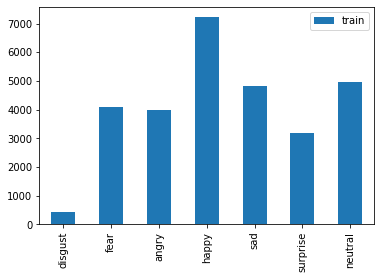

In [4]:
#plot the number of images for each expression
train_count.transpose().plot(kind='bar')

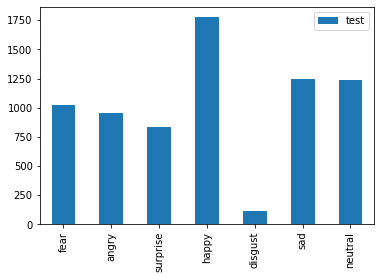

In [5]:
test_count.transpose().plot(kind='bar')
 

In [ ]:
!pip install keras

In [6]:

 from keras_preprocessing.image import load_img

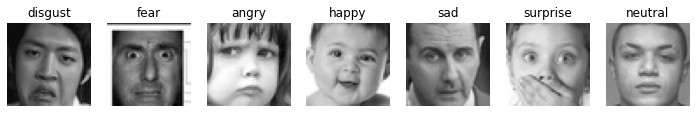

In [7]:

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,8,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

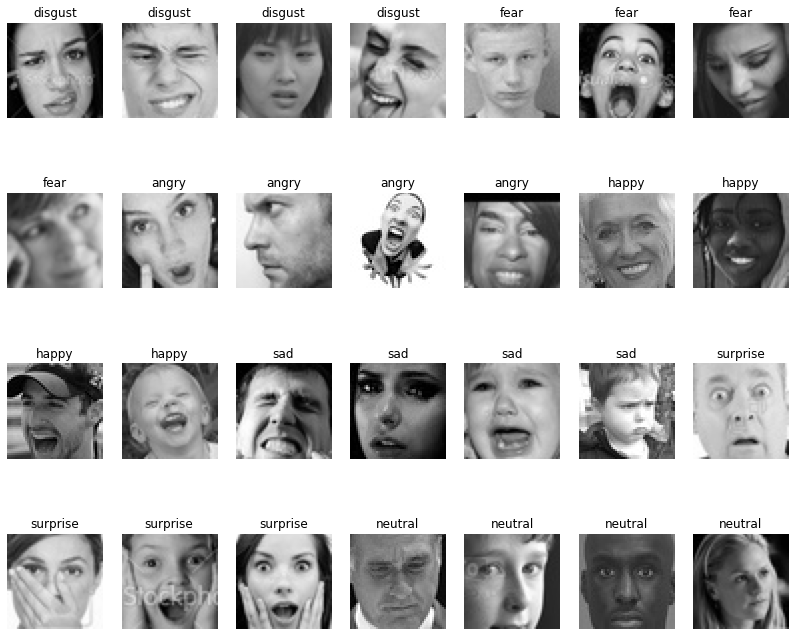

In [8]:
plt.figure(figsize=(14,12))
i = 1
for expression in os.listdir(train_dir):
    for j in range(4):
        img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[j]))
        plt.subplot(4,7,i)
        plt.imshow(img)
        plt.title(expression)
        plt.axis('off')
        i += 1
plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 batch_size=64,
                                                 target_size=(48,48),
                                                 shuffle=True,
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 subset='training')
validation_set = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=64,
                                                   target_size=(48,48),
                                                   shuffle=True,
                                                   color_mode='grayscale',
                                                   class_mode='categorical',
                                                   subset='validation')


Found 22972 images belonging to 7 classes.
Found 5742 images belonging to 7 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
test_set = test_datagen.flow_from_directory(test_dir,
                                            batch_size=64,
                                            target_size=(48,48),
                                            shuffle=True,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [11]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:
# CNN model
weight_decay = 1e-4
num_classes = 7

In [13]:
model = tf.keras.models.Sequential()
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation="linear"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(256, activation="linear"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                        

**Training simple**

In [14]:
checkpointer = [
    EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 5),
    ModelCheckpoint(filepath='/content/drive/My Drive/model.weights.best.hdf5',monitor="val_accuracy",verbose=1,
                    save_best_only=True,mode="max")
]
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size
history = model.fit(x=training_set,
                    validation_data=validation_set,
                    epochs=40,
                    callbacks=[checkpointer],
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/40
358/358 [==============================] - ETA: 0s - loss: 2.3410 - accuracy: 0.2224 
Epoch 1: val_accuracy improved from -inf to 0.17995, saving model to /content/drive/My Drive/model.weights.best.hdf5
358/358 [==============================] - 6519s 18s/step - loss: 2.3410 - accuracy: 0.2224 - val_loss: 2.1935 - val_accuracy: 0.1800
Epoch 2/40
358/358 [==============================] - ETA: 0s - loss: 2.0626 - accuracy: 0.3010
Epoch 2: val_accuracy improved from 0.17995 to 0.38220, saving model to /content/drive/My Drive/model.weights.best.hdf5
358/358 [==============================] - 44s 121ms/step - loss: 2.0626 - accuracy: 0.3010 - val_loss: 1.7838 - val_accuracy: 0.3822
Epoch 3/40
358/358 [==============================] - ETA: 0s - loss: 1.8815 - accuracy: 0.3604
Epoch 3: val_accuracy improved from 0.38220 to 0.43100, saving model to /content/drive/My Drive/model.weights.best.hdf5
358/358 [==============================] - 43s 121ms/step - loss: 1.8815 - accuracy: 0

**# train the model**

In [15]:

from keras.callbacks import ReduceLROnPlateau 
from keras.callbacks import ModelCheckpoint, EarlyStopping
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy", 
    patience = 2,
    verbose = 1, 
    
    factor = 0.5, 
    min_lr = 0.000000001
)

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    mode = "max",
)

checkpoint = ModelCheckpoint(
    monitor = "val_accuracy",
    filepath = "/content/drive/My Drive/Face_recongnition_sentiment_.{epoch:02d}-{val_accuracy:.6f}.hdf5",
    verbose = 1,
    save_best_only = True, 
    save_weights_only = True
)

In [16]:
history = model.fit(
    training_set,
    epochs = 20, 
    validation_data = validation_set,
    validation_steps = validation_set.n // validation_set.batch_size,
    steps_per_epoch = training_set.n // training_set.batch_size,
    callbacks = [reduce_lr, early_stopping, checkpoint]
)


 

Epoch 1/20
358/358 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.9056
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to /content/drive/My Drive/Face_recongnition_sentiment_.01-0.625000.hdf5
358/358 [==============================] - 41s 115ms/step - loss: 0.4577 - accuracy: 0.9056 - val_loss: 1.6501 - val_accuracy: 0.6250 - lr: 1.0000e-04
Epoch 2/20
358/358 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.9090
Epoch 2: val_accuracy did not improve from 0.62500
358/358 [==============================] - 41s 114ms/step - loss: 0.4551 - accuracy: 0.9090 - val_loss: 1.6643 - val_accuracy: 0.6159 - lr: 1.0000e-04
Epoch 3/20
358/358 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.9097
Epoch 3: val_accuracy improved from 0.62500 to 0.62886, saving model to /content/drive/My Drive/Face_recongnition_sentiment_.03-0.628862.hdf5
358/358 [==============================] - 42s 118ms/step - loss: 0.4494 - acc

Evaluating Model Performance

PLOTTING TRAINING LOSS/ VAL-LOSS VS EPOCHS

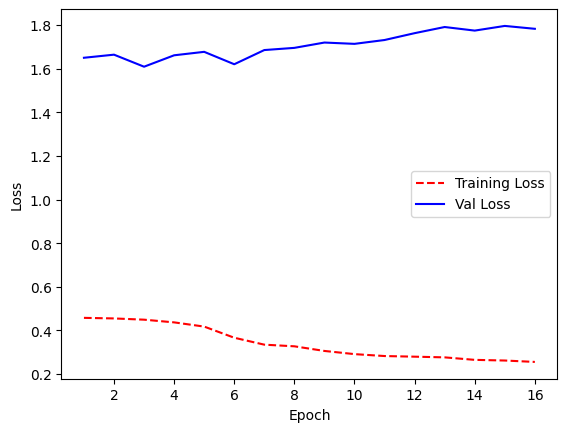

In [17]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use(['default'])
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**PLOTTING ACCURACY/VAL_ACCURACY VS EPOCHS**

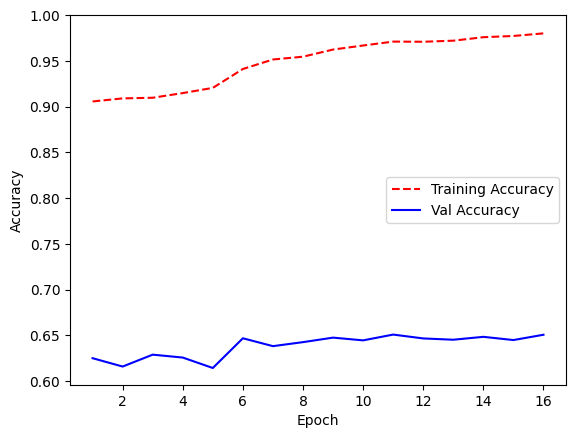

In [18]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)
# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

Saving Model

Saving the trained model is important so that it can be loaded later for testing without the need of training all over again

In [19]:
model.save("/content/drive/My Drive/fer7_model.h5")

Plotting predictions

In [20]:
model=load_model("/content/drive/My Drive/fer7_model.h5")

2/2 [==============================] - 1s 10ms/step


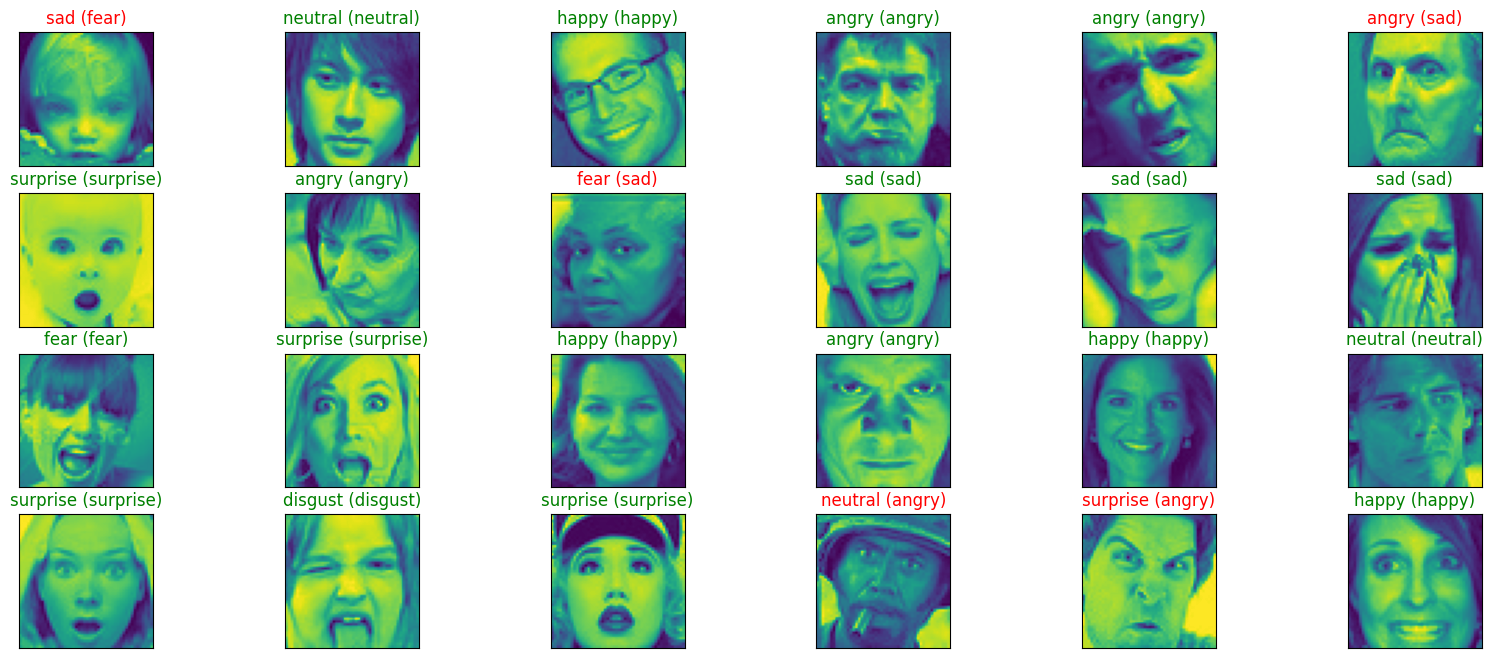

In [21]:
# next function assigns one batch to variables, i.e x_test,y_test will have 64 images
x_test,y_test = next(test_set)
predict = model.predict(x_test)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
  ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[index]))#squeezed [ndarray] The input array, but with all or a subset of the dimensions of length 1 removed. This is always a itself or a view into arr.
  predict_index = class_labels[(np.argmax(predict[index]))]
  true_index = class_labels[(np.argmax(y_test[index]))]
  ax.set_title("{} ({})".format((predict_index),(true_index)),color=("green" if predict_index == true_index else "red"))

plt.show()

2/2 [==============================] - 0s 14ms/step


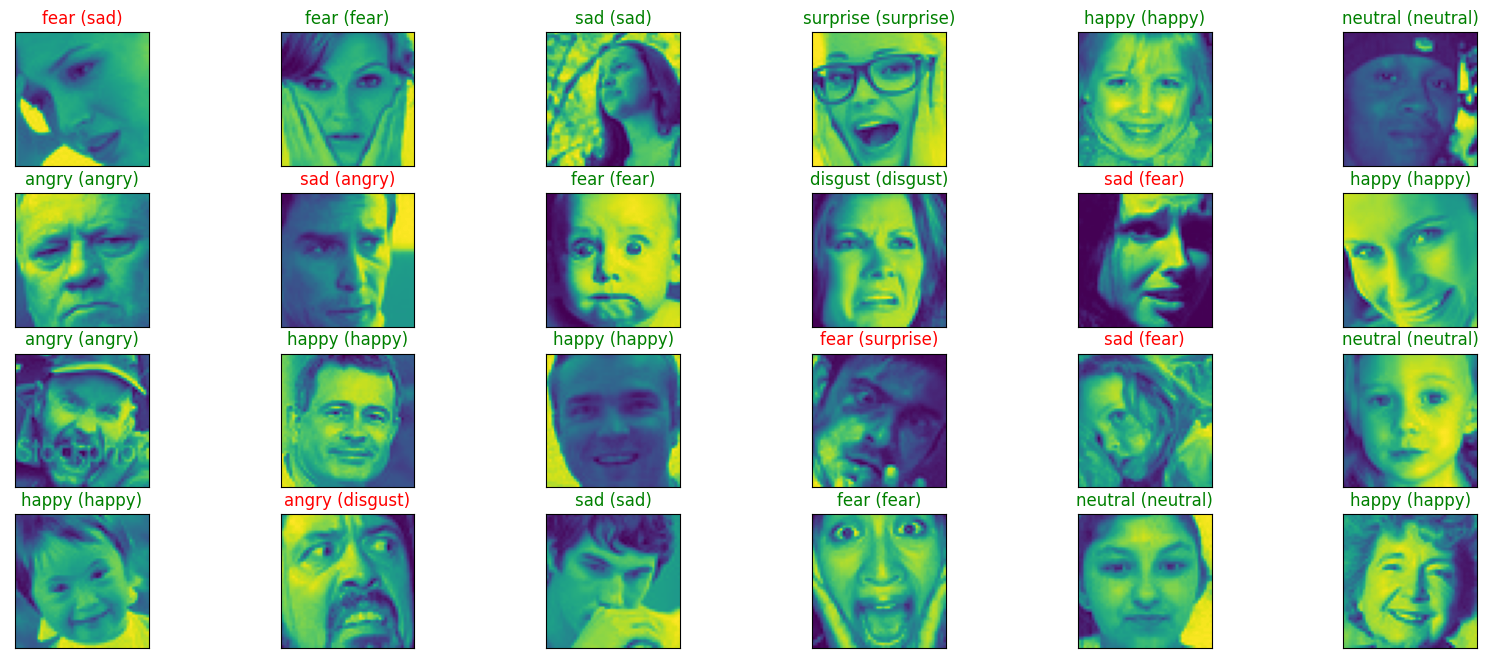

In [22]:
x_test,y_test = next(test_set)
predict = model.predict(x_test)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
  ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[index]))#squeezed [ndarray] The input array, but with all or a subset of the dimensions of length 1 removed. This is always a itself or a view into arr.
  predict_index = class_labels[(np.argmax(predict[index]))]
  true_index = class_labels[(np.argmax(y_test[index]))]
  ax.set_title("{} ({})".format((predict_index),(true_index)),color=("green" if predict_index == true_index else "red"))

plt.show()